In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#DATA SHAPES

airlines = pd.read_csv('airlines.csv')
airports= pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv', low_memory=False)
print (airlines.shape)
print (airports.shape)
print (flights.shape)

(14, 2)
(322, 7)
(5819079, 31)


In [82]:
#ADD AIRLINE/AIRPORT NAMES TO DICTIONARY
airlines_dict = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
airport_dict = airports.set_index('IATA_CODE')['AIRPORT'].to_dict()
flights['AIRLINE_NAME'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
# flights.head(1000)

In [83]:
#FLIGHTS OPERATION

cancelled = flights[flights['CANCELLED'] == 1].count()['CANCELLED']
scheduled = flights.count()['SCHEDULED_DEPARTURE']
operated = scheduled - cancelled

print("Scheduled flights: ", scheduled)
print("Cancelled flights: ", cancelled)
print("Operated flights: ", operated)

Scheduled flights:  5819079
Cancelled flights:  89884
Operated flights:  5729195


In [84]:
#MEAN FLIGHTS CANCELLATION

df_cancel = pd.DataFrame({'CANCELLATION_RATE' : flights.groupby(['AIRLINE_NAME'])['CANCELLED'].mean()})
df_cancel.sort_values('CANCELLATION_RATE', ascending=False, inplace=True)
df_cancel

,CANCELLATION_RATE
AIRLINE_NAME,
American Eagle Airlines Inc.,0.050996
Atlantic Southeast Airlines,0.026629
US Airways Inc.,0.020466
Spirit Air Lines,0.017073
Skywest Airlines Inc.,0.016929
JetBlue Airways,0.016012
American Airlines Inc.,0.015040
United Air Lines Inc.,0.012745
Southwest Airlines Co.,0.012714


In [85]:
#MEAN ARRIVAL/DEPARTURE DELAY IN MINUTES BY AIRLINE

df_delay = pd.DataFrame(flights.groupby('AIRLINE_NAME')[['DEPARTURE_DELAY','ARRIVAL_DELAY']].mean())
df_delay.sort_values('ARRIVAL_DELAY', ascending=False, inplace=True)
df_delay

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE_NAME,,
Spirit Air Lines,15.944766,14.471800
Frontier Airlines Inc.,13.350858,12.504706
JetBlue Airways,11.514353,6.677861
Atlantic Southeast Airlines,8.715934,6.585379
American Eagle Airlines Inc.,10.125188,6.457873
Skywest Airlines Inc.,7.801104,5.845652
United Air Lines Inc.,14.435441,5.431594
Virgin America,9.022595,4.737706
Southwest Airlines Co.,10.581986,4.374964


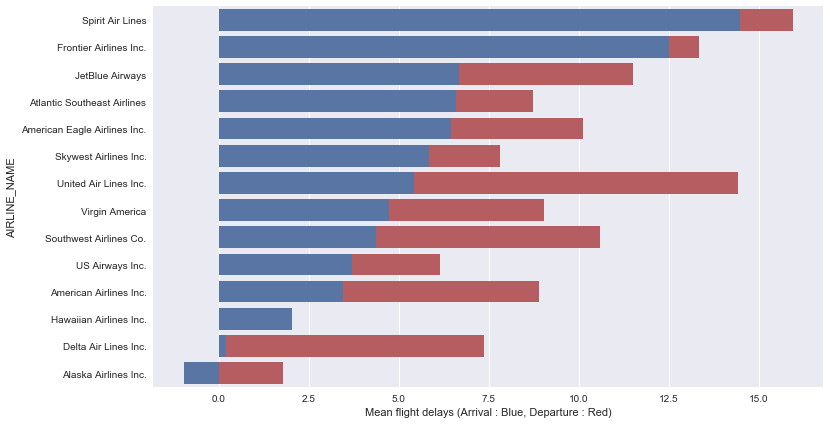

In [86]:
#MEAN ARRIVAL/DEPATURE DELAY BY AIRLINE GRAPH

df_delay.sort_values(['ARRIVAL_DELAY','DEPARTURE_DELAY'],ascending=False,inplace=True)
plt.figure(figsize=(12,7))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='DEPARTURE_DELAY',y=df_delay.index,data = df_delay,color = 'r')
plot = sns.barplot(x='ARRIVAL_DELAY',y=df_delay.index,data = df_delay,color = 'b')
plot.set(xlabel='Mean flight delays (Arrival : Blue, Departure : Red)')

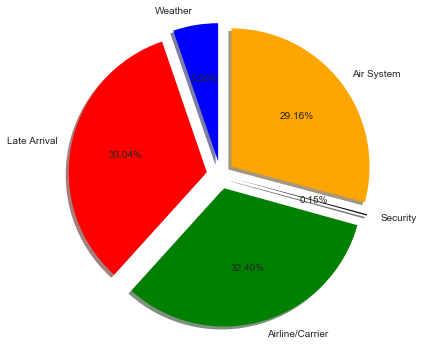

In [87]:
#DELAY REASONS

delays_weather = flights.loc[(flights['WEATHER_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
delays_lateaircraft = flights.loc[(flights['LATE_AIRCRAFT_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
delays_airline = flights.loc[(flights['AIRLINE_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
delays_security = flights.loc[(flights['SECURITY_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
delays_airsystem = flights.loc[(flights['AIR_SYSTEM_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()

labels = 'Weather', 'Late Arrival', 'Airline/Carrier', 'Security', 'Air System'
sizes = [delays_weather, delays_lateaircraft, delays_airline, delays_security, delays_airsystem]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
colors=['blue','red','green','black','orange']

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()